In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.io as pio

pd.set_option('display.max_columns', None)

In [141]:
mvpData = pd.read_csv('./nba_mvp_dataset.csv')
teamData = pd.read_csv('./Team_Records.csv')
mvpData.tail(10)
# reformatting data to remove undefined rows and only include MVPs post 1980
data = mvpData[25:64]

In [171]:
data.columns

Index(['Year', 'Player ', 'Age', 'Years of Experience (YOE)', 'Team',
       'First Place Votes', 'Total Voting Points ', 'Voting Point Max',
       'Games Played (GP)', 'Team Winning Percentage', 'Team Wins (TW)',
       'Team Losses (TL)', 'Offensive Rating (ORtg)',
       'Defensive Rating (DRtg)', 'Net Rating (NRtg)', 'Minutes Played (MP)',
       'Minutes Played Per Game (MPG)', 'Points (PTS)',
       'Points Per Game (PPG)', 'Rebounds (REB)',
       'Total Rebounds Per Game (TRB)', 'Offensive Rebounds Per Game (ORB)',
       'Defensive Per Game (DRB)', 'Assist (AST)', 'Assist Per Game (APG)',
       'Steals Per Game (SPG)', 'Blocks Per Game (BPG)',
       'Field Goal Percentage (FG%)', '2 Point Field Goal Made (2P)',
       '3 Point Field Goal Made (3P)', 'Three Point Percentage (3P%)',
       'Free Throw Percentage (FT%)', 'True Shooting Percentage (TS%)',
       'Offensive Win Shares (OWS)', 'Defensive Win Shares (DWS)',
       'Win Shares (WS)', 'Win Shares Per 48 mins (WS/48)

In [143]:
data.columns
colYear = data['Year']
data['Year_Simplified'] = data['Year'].str.slice(5,7)
# shortened year to only include last 2 digits of season year

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The average MVP scored approximately 26.7 points per game. According to the graph, the majority of MVP lies between 32.5 and 22.5 ppg with the Steve Nash being an outlier in 2005.

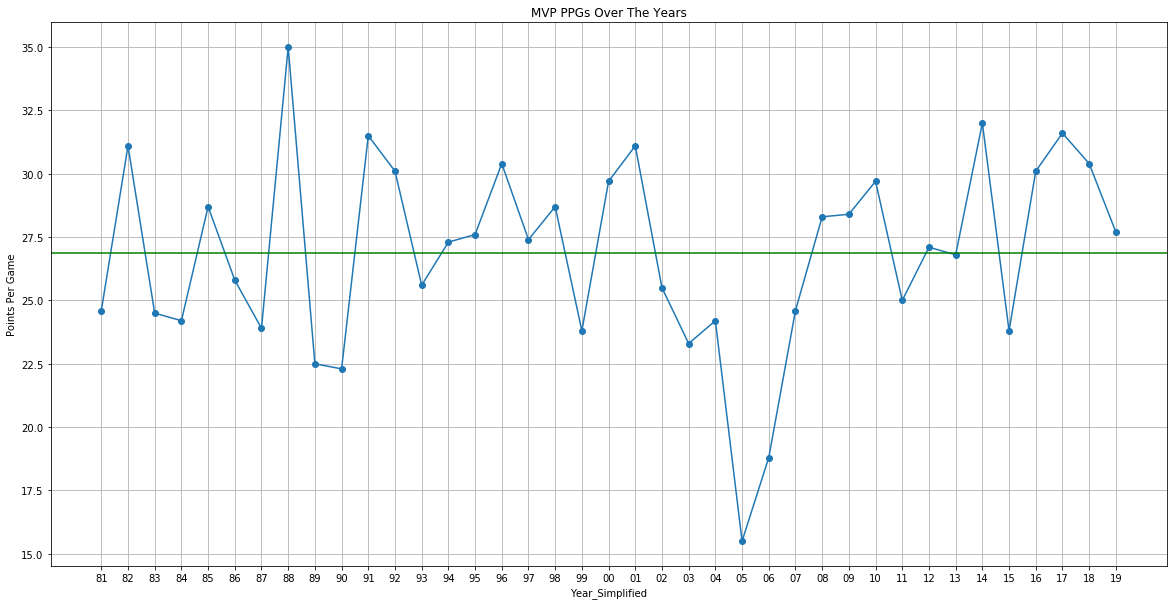

MVP points per game mean: 26.887179487179484


In [144]:
ppgMean = data['Points Per Game (PPG)'].mean(axis=0)

plt.figure(figsize=(20,10))
plt.plot(data['Year_Simplified'], data['Points Per Game (PPG)'], marker='o')
plt.axhline(ppgMean, color='g')


plt.title('MVP PPGs Over The Years')
plt.ylabel('Points Per Game')
plt.xlabel('Year_Simplified')
plt.grid(True)
plt.show()
print('MVP points per game mean:', ppgMean)

The average MVP had approximately 6 assists per game. The graph has greater range of values than the graph for points.

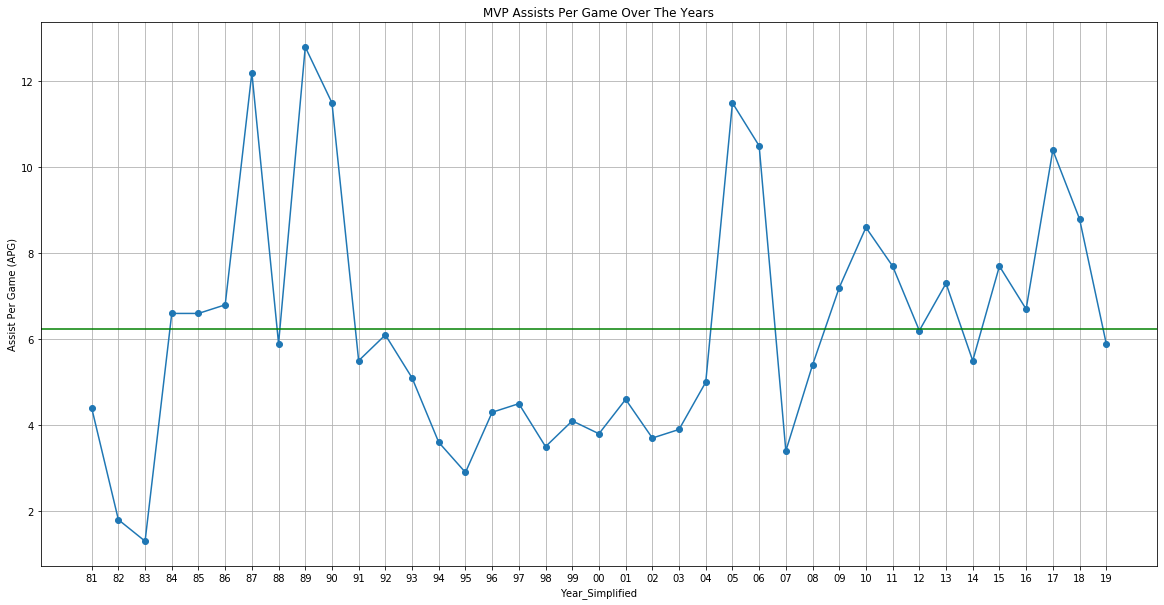

MVP assists per game mean: 6.238461538461538


In [145]:
assistsPerGameMean = data['Assist Per Game (APG)'].mean(axis=0)

plt.figure(figsize=(20,10))
plt.plot(data['Year_Simplified'], data['Assist Per Game (APG)'], marker='o')
plt.axhline(assistsPerGameMean, color='g')


plt.title('MVP Assists Per Game Over The Years')
plt.ylabel('Assist Per Game (APG)')
plt.xlabel('Year_Simplified')
plt.grid(True)
plt.show()
print('MVP assists per game mean:', assistsPerGameMean)

The average MVP had approximately 8.5 total rebounds per game. Unlike the previous graphs, the values seem to be either high or low, with few in the center.

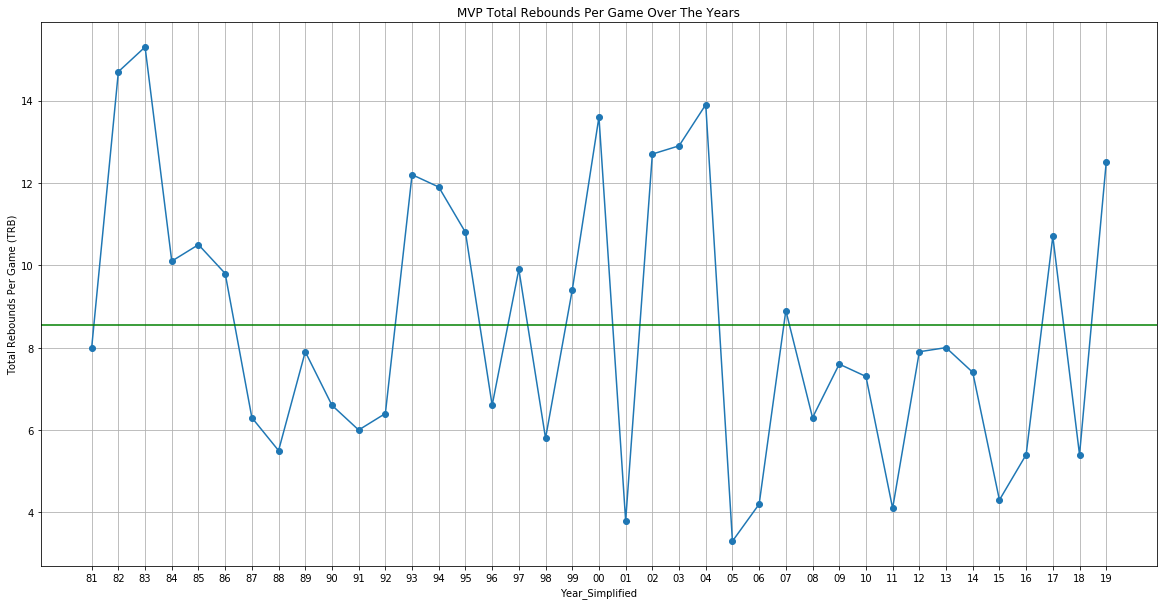

MVP total rebounds per game mean: 8.561538461538463


In [146]:
totalReboundsPerGameMean = data['Total Rebounds Per Game (TRB)'].mean(axis=0)

plt.figure(figsize=(20,10))
plt.plot(data['Year_Simplified'], data['Total Rebounds Per Game (TRB)'], marker='o')
plt.axhline(totalReboundsPerGameMean, color='g')


plt.title('MVP Total Rebounds Per Game Over The Years')
plt.ylabel('Total Rebounds Per Game (TRB)')
plt.xlabel('Year_Simplified')
plt.grid(True)
plt.show()
print('MVP total rebounds per game mean:', totalReboundsPerGameMean)

The average team winning percentage of the MVP is 74.23%.

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


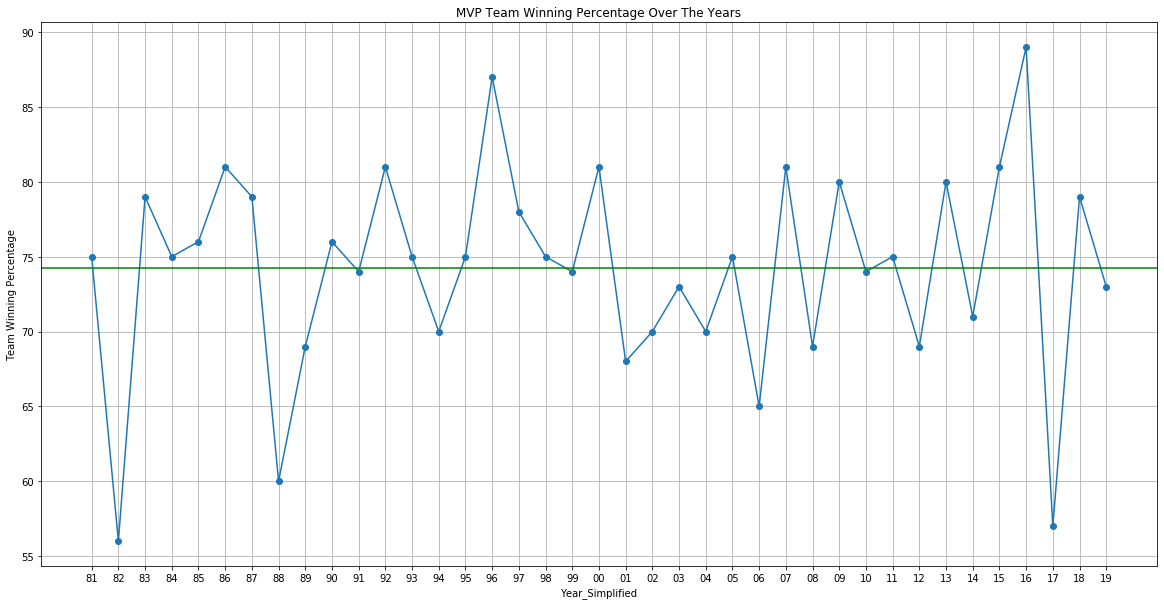

Average Team Winning Percentage 74.23076923076923


In [147]:
data['Team Winning Percentage'] = data['Team Winning Percentage'].str.slice(0,2).astype(int)
#print(type(data['Team Winning Percentage'].iloc[0]))
teamWinningPercentageMean = data['Team Winning Percentage'].mean(axis=0)

plt.figure(figsize=(20,10))
plt.plot(data['Year_Simplified'], data['Team Winning Percentage'], marker='o')
plt.axhline(teamWinningPercentageMean, color='g')

plt.title('MVP Team Winning Percentage Over The Years')
plt.ylabel('Team Winning Percentage')
plt.xlabel('Year_Simplified')
plt.grid(True)
plt.show()
print('Average Team Winning Percentage', teamWinningPercentageMean)

Based on the bar graph below, it is evident that majority of MVPs over the years have a team winning percentage of between 70-80 percentage with few in the 50-60 percent range. The MVP would likely be on a top team in their conference and have a high seed going into the playoffs.

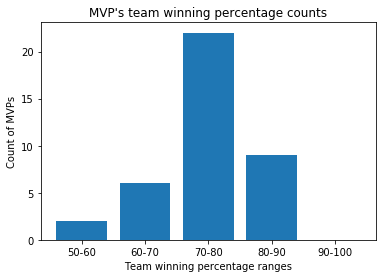

In [148]:
winningPercentageCounts = [0,0,0,0,0] #index 0 represents team winning percentage 50-60, index 1 is 60-70 and so on
winningPercentageCounts[0] = len(data[(data['Team Winning Percentage'] >= 50) & (data['Team Winning Percentage'] < 60)])
winningPercentageCounts[1] = len(data[(data['Team Winning Percentage'] >= 60) & (data['Team Winning Percentage'] < 70)])
winningPercentageCounts[2] = len(data[(data['Team Winning Percentage'] >= 70) & (data['Team Winning Percentage'] < 80)])
winningPercentageCounts[3] = len(data[(data['Team Winning Percentage'] >= 80) & (data['Team Winning Percentage'] < 90)])
winningPercentageCounts[4] = len(data[(data['Team Winning Percentage'] >= 90) & (data['Team Winning Percentage'] < 100)])

winningPercentageRanges = ['50-60', '60-70', '70-80', '80-90', '90-100']

plt.bar(winningPercentageRanges, winningPercentageCounts)
plt.title('MVP\'s team winning percentage counts')
plt.xlabel('Team winning percentage ranges')
plt.ylabel('Count of MVPs')
plt.show()   

Most MVPs are between the ages 27-29.

Text(0, 0.5, 'Count')

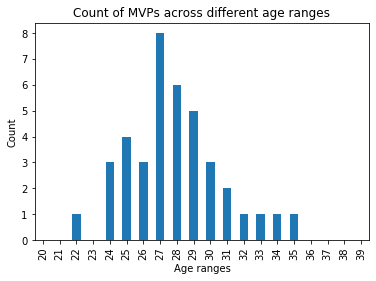

In [150]:
data['Age'].value_counts(sort=False).reindex(np.arange(20,40), fill_value=0).plot.bar()
plt.title('Count of MVPs across different age ranges')
plt.xlabel('Age ranges')
plt.ylabel('Count')

Most MVPs only miss approximately 0 to 7 games within the season. With the exception of Karl Malone in 1988-1989 who played less than 50 games and Lebron James in 2011-2012 who missed 20 games. 

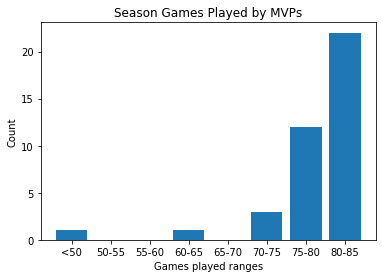

,Year,Player,Age,Years of Experience (YOE),Team,First Place Votes,Total Voting Points,Voting Point Max,Games Played (GP),Team Winning Percentage,Team Wins (TW),Team Losses (TL),Offensive Rating (ORtg),Defensive Rating (DRtg),Net Rating (NRtg),Minutes Played (MP),Minutes Played Per Game (MPG),Points (PTS),Points Per Game (PPG),Rebounds (REB),Total Rebounds Per Game (TRB),Offensive Rebounds Per Game (ORB),Defensive Per Game (DRB),Assist (AST),Assist Per Game (APG),Steals Per Game (SPG),Blocks Per Game (BPG),Field Goal Percentage (FG%),2 Point Field Goal Made (2P),3 Point Field Goal Made (3P),Three Point Percentage (3P%),Free Throw Percentage (FT%),True Shooting Percentage (TS%),Offensive Win Shares (OWS),Defensive Win Shares (DWS),Win Shares (WS),Win Shares Per 48 mins (WS/48),Turnovers Per Game (TO),Personal Fouls Per Game (PF),Value Over Replacement Player (VORP),Player Efficiency Rating (PER),Value Added (VA),Estimated Wins Added (EWA),Usage Rate (USG),Plus/Minus (PM),Offensive Plus/Minus (OPM),Defensive Plus/Minus (DPM),Year_Simplified
43,1998-99,Karl Malone,35.0,13.0,UTA,44.0,827.0,1180.0,49.0,74,37.0,13.0,105.8,98.4,7.4,1832.0,37.4,1164.0,23.8,463.0,9.4,2.2,7.3,201.0,4.1,1.3,0.6,0.493,393.0,0.0,0.0,0.788,0.577,6.2,3.4,9.6,0.252,3.3,2.7,4.0,25.6,410.1,13.7,30.5,6.7,5.3,1.4,99


,Year,Player,Age,Years of Experience (YOE),Team,First Place Votes,Total Voting Points,Voting Point Max,Games Played (GP),Team Winning Percentage,Team Wins (TW),Team Losses (TL),Offensive Rating (ORtg),Defensive Rating (DRtg),Net Rating (NRtg),Minutes Played (MP),Minutes Played Per Game (MPG),Points (PTS),Points Per Game (PPG),Rebounds (REB),Total Rebounds Per Game (TRB),Offensive Rebounds Per Game (ORB),Defensive Per Game (DRB),Assist (AST),Assist Per Game (APG),Steals Per Game (SPG),Blocks Per Game (BPG),Field Goal Percentage (FG%),2 Point Field Goal Made (2P),3 Point Field Goal Made (3P),Three Point Percentage (3P%),Free Throw Percentage (FT%),True Shooting Percentage (TS%),Offensive Win Shares (OWS),Defensive Win Shares (DWS),Win Shares (WS),Win Shares Per 48 mins (WS/48),Turnovers Per Game (TO),Personal Fouls Per Game (PF),Value Over Replacement Player (VORP),Player Efficiency Rating (PER),Value Added (VA),Estimated Wins Added (EWA),Usage Rate (USG),Plus/Minus (PM),Offensive Plus/Minus (OPM),Defensive Plus/Minus (DPM),Year_Simplified
56,2011-12,LeBron James,27.0,8.0,MIA,85.0,1074.0,1210.0,62.0,69,46.0,20.0,106.6,100.2,6.4,2326.0,37.5,1683.0,27.1,492.0,7.9,1.5,6.4,387.0,6.2,1.9,0.8,0.531,567.0,54.0,0.362,0.771,0.605,10.0,4.5,14.5,0.298,3.4,1.5,7.6,30.7,704.8,23.5,32.0,10.9,8.2,2.7,12


In [169]:
gamesPlayedCount = [0,0,0,0,0,0,0,0] #index 0 represents team winning percentage 50-60, index 1 is 60-70 and so on

gamesPlayedCount[0] = len(data[(data['Games Played (GP)'] < 50)])
gamesPlayedCount[1] = len(data[(data['Games Played (GP)'] >= 50) & (data['Games Played (GP)'] < 55)])
gamesPlayedCount[2] = len(data[(data['Games Played (GP)'] >= 55) & (data['Games Played (GP)'] < 60)])
gamesPlayedCount[3] = len(data[(data['Games Played (GP)'] >= 60) & (data['Games Played (GP)'] < 65)])
gamesPlayedCount[4] = len(data[(data['Games Played (GP)'] >= 65) & (data['Games Played (GP)'] < 70)])
gamesPlayedCount[5] = len(data[(data['Games Played (GP)'] >= 70) & (data['Games Played (GP)'] < 75)])
gamesPlayedCount[6] = len(data[(data['Games Played (GP)'] >= 75) & (data['Games Played (GP)'] < 80)])
gamesPlayedCount[7] = len(data[(data['Games Played (GP)'] >= 80) & (data['Games Played (GP)'] < 85)])


gamesPlayedRanges = ['<50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85']

plt.bar(gamesPlayedRanges, gamesPlayedCount)
plt.title('Season Games Played by MVPs')
plt.xlabel('Games played ranges')
plt.ylabel('Count')
plt.show()

display(data[(data['Games Played (GP)'] < 50)])
display(data[(data['Games Played (GP)'] >= 60) & (data['Games Played (GP)'] < 65)])